# Question: Does adding bonds between two particles in hoomd more than once result in an increase in bond energy?

In [98]:
import hoomd
from hoomd import md
import hoomd.deprecated
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
%matplotlib inline

def make_bond(index_a, index_b, snapshot):
    n_bonds = snapshot.bonds.N
    snapshot.bonds.resize(n_bonds + 1)
    snapshot.bonds.group[n_bonds] = [index_a, index_b]
    # sets new bond to be A-B type
    snapshot.bonds.typeid[n_bonds] = 0  # we know A-B bond type's id is 1
    
hoomd.context.initialize('--mode=cpu')
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sc(a=1.0),n=(2,1,1))

snapshot = system.take_snapshot(bonds=True)
snapshot.bonds.types = ['A-A']
make_bond(0,1,snapshot)
system.restore_snapshot(snapshot)

hoomd.md.integrate.mode_standard(dt=0.005)
hoomd.md.integrate.nve(group=hoomd.group.all())
harmonic = md.bond.harmonic()
harmonic.bond_coeff.set('A-A', k=1.0, r0=1.0)
    
p2_poss = np.linspace(0.0,1.0,10)
print(p2_poss)
hoomd.util.quiet_status()
xs=[]
ys=[]
bonds=[]
for nbond in range(4):
    energies = []
    distances = []
    for p2_pos in p2_poss:
        snapshot = system.take_snapshot(bonds=True)
        snapshot.particles.position[:] = [(-0.5, 0., 0.),(p2_pos, 0., 0.)]
        
        print(snapshot.particles.position)
        print('Initial box dimension: {}'.format(snapshot.box))
        print('Number of particles:',snapshot.particles.N)

        system.restore_snapshot(snapshot)

        hoomd.run(1)
        energy = harmonic.get_energy(hoomd.group.all())
        distances.append(p2_pos+0.5)
        energies.append(energy)
        
    xs.append(distances)
    ys.append(energies)
    
    snapshot = system.take_snapshot(bonds=True)
    make_bond(1,0,snapshot)
    bonds.append(snapshot.bonds.N)
    system.restore_snapshot(snapshot)

notice(2): Group "all" created containing 2 particles
[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[[-0.5  0.   0. ]
 [ 0.   0.   0. ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 1 / 1 | TPS 4.321 | ETA 00:00:00
Average TPS: 4.25595
---------
** run complete **
[[-0.5         0.          0.        ]
 [ 0.11111111  0.          0.        ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 2 / 2 | TPS 125000 | ETA 00:00:00
Average TPS: 279.408
---------
** run complete **
[[-0.5         0.          0.        ]
 [ 0.22222222  0.          0.        ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 3 / 3 | TPS 200000 | ET

** run complete **
[[-0.5        0.         0.       ]
 [ 0.8888889  0.         0.       ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 29 / 29 | TPS 200000 | ETA 00:00:00
Average TPS: 585.138
---------
** run complete **
[[-0.5  0.   0. ]
 [ 1.   0.   0. ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 30 / 30 | TPS 250000 | ETA 00:00:00
Average TPS: 516.529
---------
** run complete **
[[-0.5  0.   0. ]
 [ 0.   0.   0. ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Number of particles: 2
** starting run **
Time 00:00:00 | Step 31 / 31 | TPS 333333 | ETA 00:00:00
Average TPS: 361.011
---------
** run complete **
[[-0.5         0.          0.        ]
 [ 0.11111111  0.          0.        ]]
Initial box dimension: Box: Lx=2.0 Ly=1.0 Lz=1.0 xy=0.0 xz=

/Users/stephenthomas/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


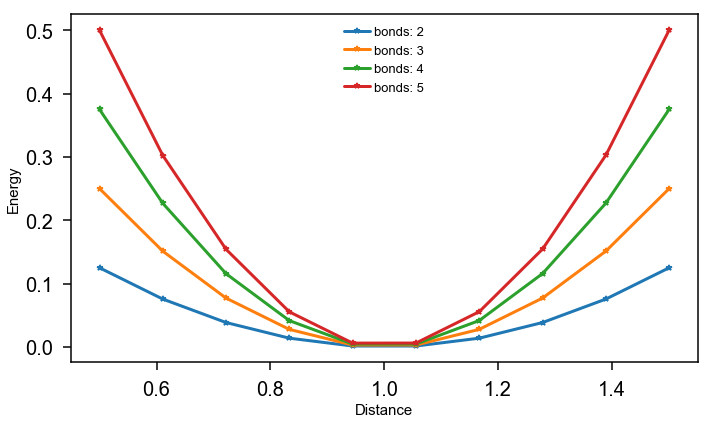

In [99]:
plt.figure(figsize=(10,6))
for i,x in enumerate(xs):
    snapshot = system.take_snapshot(bonds=True)
    n_bonds = bonds[i]
    plt.plot(x,ys[i],marker='*',label='bonds: {}'.format(n_bonds))
plt.legend(fontsize=13)
plt.xlabel("Distance",fontsize=15)
plt.ylabel("Energy",fontsize=15)
plt.show()
hoomd.deprecated.dump.xml(group=hoomd.group.all(), filename='final.hoomdxml', all=True)